In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
from sklearn.datasets import load_iris

df = load_iris(as_frame=True).frame
display(df.head(), df.shape)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


(150, 5)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [70]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


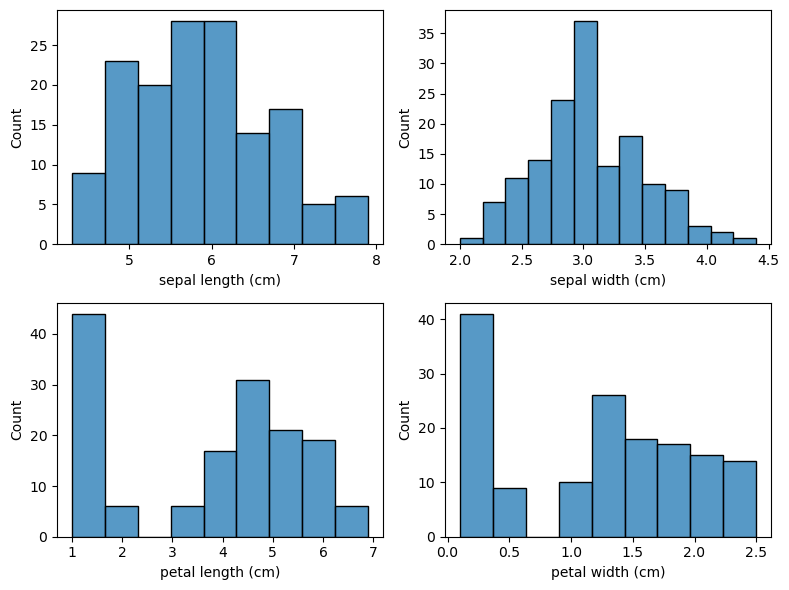

In [71]:
fig, ax = plt.subplots(2, 2, figsize=(8, 6))
ax = ax.flatten()

for i, col in enumerate(df.columns[:-1]):
    sns.histplot(data=df, x=col, ax=ax[i])

plt.tight_layout()
plt.show()

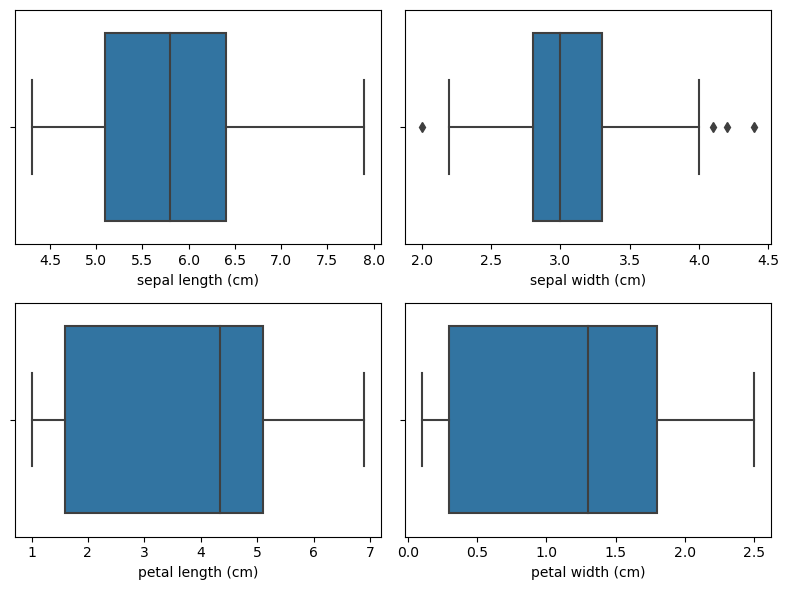

In [72]:
fig, ax = plt.subplots(2, 2, figsize=(8, 6))
ax = ax.flatten()

for i, col in enumerate(df.columns[:-1]):
    sns.boxplot(data=df, x=col, ax=ax[i])

plt.tight_layout()
plt.show()

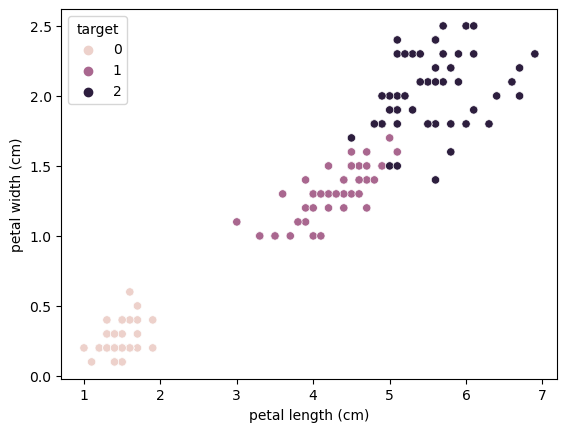

In [73]:
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='target')
plt.show()

<b>Observation:</b>
<p>You can see a clear distinction between between the target and petal length and width, the flowers that have higher length and width below to a certain class</p>

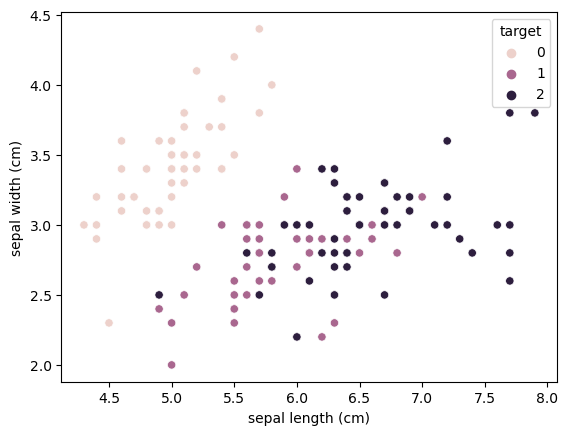

In [74]:
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='target')
plt.show()

## Data Preprocessing

In [75]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
])

X_train_scaled = pipeline.fit_transform(X_train)


## Modelling

### Base Model using Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
ypred = log_reg.predict(X_train_scaled)
accuracy = accuracy_score(y_train, ypred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9333333333333333


In [77]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train_scaled, y_train)
ypred = linear_svc.predict(X_train_scaled)
accuracy = accuracy_score(y_train, ypred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.95


### Base Model using SVM

In [81]:
from sklearn.svm import SVC

svc = SVC(kernel='poly')
svc.fit(X_train_scaled, y_train)
ypred = svc.predict(X_train_scaled)
accuracy = accuracy_score(y_train, ypred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9833333333333333


In [82]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_train, ypred)

array([[42,  0,  0],
       [ 0, 37,  2],
       [ 0,  0, 39]])

In [83]:
print(classification_report(y_train, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      0.95      0.97        39
           2       0.95      1.00      0.97        39

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



## Hyperparameter Tuning using GridSearchCV

In [90]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5],
    'gamma': [1, 0.1, 0.01, 0.001],
    'coef0': [0, 1, 2, 3, 4],
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, verbose=1)
grid_search.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 1280 candidates, totalling 6400 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 10, 100, 1000], 'coef0': [0, 1, 2, 3, 4],
                         'degree': [2, 3, 4, 5], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=1)

In [91]:
grid_search.best_params_

{'C': 10, 'coef0': 0, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}

In [92]:
best_model = grid_search.best_estimator_.fit(X_train_scaled, y_train)

In [93]:
grid_pred = best_model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, grid_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9833333333333333


In [94]:
confusion_matrix(y_train, grid_pred)

array([[42,  0,  0],
       [ 0, 39,  0],
       [ 0,  2, 37]])

In [95]:
print(classification_report(y_train, grid_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.95      1.00      0.97        39
           2       1.00      0.95      0.97        39

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [96]:
test_scaled = pipeline.transform(X_test)


In [98]:
test_pred = best_model.predict(test_scaled)
accuracy = accuracy_score(y_test, test_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9333333333333333


In [99]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.85      1.00      0.92        11
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



In [100]:
pred = svc.predict(test_scaled)
accuracy = accuracy_score(y_test, pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9666666666666667


In [102]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.92      1.00      0.96        11
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

